<a href="https://colab.research.google.com/github/DrBart20/EksploracjaDanych/blob/main/Zaj5/wykrywanie_elementow_odstajacych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# **Elementy odstające (*ang. outliers*)**

**Elementy odstające** to punkty danych znalazujące się w znacznej odległości od grupy innych punktów - byty wyróżniające się z tłumu.

Problemy spowodowane outliersami:

* Długi czas uczenia modelu predykcyjnego
* Kiepska dokładność predykcji
* Zwiększenie błędu wariancji
* Zmniejszenie normalności rozkładu danych
* Osłabienie mocy testów statystycznych

## Typy elementów odstających

**1. OUTLIERSY JEDNOWYMIAROWE**

  * Występują w rozkładach opisujących jedną zmienną
  
  * Przykład: wynagrodzenia pracowników w jednej firmie
  
  * Łatwo widoczne na histogramach i wykresach pudełkowych

**2. OUTLIERSY WIELOWYMIAROWE**

 * Znajdują się w przestrzeniach n-wymiarowych

 * Przykład: dane klientów (wiek, dochód, wydatki)

 * Trudniejsze do wykrycia bez specjalnych metod

# **Metody wykrywania elementów odstających**

### **Metoda 1**: Wykres pudełkowy


* Tworzy podział punktów ze względu na kwartyle (Q1, Q2, Q3)

* Dane między Q1 a Q3 umieszczane w prostokątnych pudełkach

* Elementy odstające wyświetlane jako pojedyncze punkty poza pudełkiem

* Pokazuje rozstęp ćwiartkowy (IQR)

**Zalety**:

* Wizualna reprezentacja

* Szybkie zidentyfikowanie outliersów

* Porównanie wielu zmiennych



### **Metoda 2**: Wykres punktowy

* Wyświetla punkty na dwuwymiarowym układzie współrzędnych
* Jedna zmienna na osi X, druga na osi Y
* Idealny do wizualizacji relacji między dwoma zmiennymi
* Anomalie widoczne jako izolowane punkty daleko od klastera

**Zalety**:

* Łatwa identyfikacja outlierów wielowymiarowych
* Wizualna analiza trendów
* Pokazuje korelacje między zmiennymi

### **Metoda 3**: Wynik standaryzowany Z-score
**Formuła:**

z = (x - μ) / σ

Gdzie:

x = wartość danych,
μ = średnia (mean),
σ = odchylenie standardowe (standard deviation)

**Reguła**:

|z| > 3 → element odstający (99.7% danych powinno mieć |z| ≤ 3)

|z| > 2.5 → potencjalny outlier

**Założenia:**

* Rozkład normalny danych

* Metoda parametryczna

### **Metoda 4**: Rozstęp ćwiartkowy (IQR)
**Formuła:**
  IQR = Q3 - Q1

Gdzie: Q1 = pierwszy kwartyl (25. percentyl), Q3 = trzeci kwartyl (75. percentyl)

**Zasada outliersów**:

* Dolny limit: Q1 - 1.5 × IQR

* Górny limit: Q3 + 1.5 × IQR

* Wartości poza limitami = outliersy

**Zalety**:

* Odporna miara (mało wrażliwa na ekstrema)
* Nie wymaga założenia o rozkładzie normalnym
* Metoda nieparametryczna



### **Metoda 5**: Percentyl

**Percentyl** dzieli dane na 100 grup o równych rozmiarach. Wartość percentyla określa procent populacji znajdujący się poniżej tej wartości.

**Przykłady**:

* 1. percentyl: bardzo niskie wartości
* 50. percentyl: mediana
* 99. percentyl: bardzo wysokie wartości



**Reguła outliersów**:

* Wartości poniżej 1. percentyla → outliersy niskie
* Wartości powyżej 99. percentyla → outliersy wysokie
* Można również użyć 5. i 95. percentyla

## **PODSUMOWANIE**

1. **CO TO OUTLIER?**
   
   Punkt danych daleko od głównej grupy, wyróżniający się z tłumu

2. **DLACZEGO WAŻNY?**
   
   Psuje modele, zmniejsza dokładność, zwiększa błąd

3. **METODY WYKRYWANIA:**

    * Boxplot (wykres pudełkowy)

    * Scatter plot (wykres punktowy)

    * Z-score (standaryzacja)

    * IQR (rozstęp ćwiartkowy)

    * Percentyle

4. **KLUCZOWE TERMINY:**
Q1, Q3, IQR, σ (sigma), μ (mu), z-score, outlier

## **Przykład praktyczny**

**Dane**:
Wynagrodzenia pracowników (tys. zł): 2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 15.0


In [ ]:
# Dane: wynagrodzenia (tys. zł)
dane = np.array([2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 15.0])
print("\n1. DANE TESTOWE:")
print(f"   Wynagrodzenia: {dane}")
print(f"   Liczba obserwacji: {len(dane)}")


1. DANE TESTOWE:
   Wynagrodzenia: [ 2.5  2.8  3.   3.2  3.5  4.   4.2  4.5  5.  15. ]
   Liczba obserwacji: 10


In [ ]:
print("\n" + "="*60)
print("METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)")
print("="*60)

Q1 = np.percentile(dane, 25)
Q3 = np.percentile(dane, 75)
IQR = Q3 - Q1
dolny_limit = Q1 - 1.5 * IQR
gorny_limit = Q3 + 1.5 * IQR

print(f"\nQ1 (25. percentyl) = {Q1:.2f}")
print(f"Q3 (75. percentyl) = {Q3:.2f}")
print(f"IQR = Q3 - Q1 = {IQR:.2f}")
print(f"\nLimity dla outliersów:")
print(f"  Dolny limit = Q1 - 1.5 × IQR = {Q1:.2f} - 1.5 × {IQR:.2f} = {dolny_limit:.2f}")
print(f"  Górny limit = Q3 + 1.5 × IQR = {Q3:.2f} + 1.5 × {IQR:.2f} = {gorny_limit:.2f}")

outliersy_iqr = dane[(dane < dolny_limit) | (dane > gorny_limit)]
print(f"\n✓ OUTLIERSY WYKRYTE (metoda IQR): {outliersy_iqr}")


METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)

Q1 (25. percentyl) = 3.05
Q3 (75. percentyl) = 4.42
IQR = Q3 - Q1 = 1.38

Limity dla outliersów:
  Dolny limit = Q1 - 1.5 × IQR = 3.05 - 1.5 × 1.38 = 0.99
  Górny limit = Q3 + 1.5 × IQR = 4.42 + 1.5 × 1.38 = 6.49

✓ OUTLIERSY WYKRYTE (metoda IQR): [15.]


In [ ]:
print("\n" + "="*60)
print("METODA 2: Z-SCORE")
print("="*60)

srednia = np.mean(dane)
std_dev = np.std(dane, ddof=1)  # ddof=1 dla próby
z_scores = np.abs(stats.zscore(dane))

print(f"\nŚrednia (μ) = {srednia:.2f}")
print(f"Odchylenie standardowe (σ) = {std_dev:.2f}")
print(f"\nFormuła: z = (x - μ) / σ")
print(f"\nZ-score dla każdej wartości:")

for i, (wartosc, z) in enumerate(zip(dane, z_scores)):
    status = "⚠️ OUTLIER" if z > 3 else ""
    print(f"  {wartosc:5.1f} → z = {z:6.2f} {status}")

outliersy_z = dane[z_scores > 3]
print(f"\n✓ OUTLIERSY WYKRYTE (z > 3): {outliersy_z}")


METODA 2: Z-SCORE

Średnia (μ) = 4.77
Odchylenie standardowe (σ) = 3.68

Formuła: z = (x - μ) / σ

Z-score dla każdej wartości:
    2.5 → z =   0.65 
    2.8 → z =   0.56 
    3.0 → z =   0.51 
    3.2 → z =   0.45 
    3.5 → z =   0.36 
    4.0 → z =   0.22 
    4.2 → z =   0.16 
    4.5 → z =   0.08 
    5.0 → z =   0.07 
   15.0 → z =   2.93 

✓ OUTLIERSY WYKRYTE (z > 3): []


In [ ]:
print("\n" + "="*60)
print("METODA 3: PERCENTYL")
print("="*60)

p1 = np.percentile(dane, 1)
p99 = np.percentile(dane, 99)
p5 = np.percentile(dane, 5)
p95 = np.percentile(dane, 95)

print(f"\n1. percentyl = {p1:.2f}")
print(f"5. percentyl = {p5:.2f}")
print(f"95. percentyl = {p95:.2f}")
print(f"99. percentyl = {p99:.2f}")

print(f"\nOutliersy poniżej 1. percentyla: {dane[dane < p1]}")
print(f"Outliersy powyżej 99. percentyla: {dane[dane > p99]}")


METODA 3: PERCENTYL

1. percentyl = 2.53
5. percentyl = 2.63
95. percentyl = 10.50
99. percentyl = 14.10

Outliersy poniżej 1. percentyla: [2.5]
Outliersy powyżej 99. percentyla: [15.]


In [ ]:
print("\n" + "="*60)
print("PODSUMOWANIE - PORÓWNANIE METOD")
print("="*60)

print(f"\n{'Metoda':<25} {'Wykryte outliersy':<30} {'Liczba'}")
print("-" * 60)
print(f"{'IQR':<25} {str(outliersy_iqr):<30} {len(outliersy_iqr)}")
print(f"{'Z-score (|z| > 3)':<25} {str(outliersy_z):<30} {len(outliersy_z)}")
print(f"{'Percentyl (1-99%)':<25} {str(dane[(dane < p1) | (dane > p99)]):<30} {len(dane[(dane < p1) | (dane > p99)])}")


PODSUMOWANIE - PORÓWNANIE METOD

Metoda                    Wykryte outliersy              Liczba
------------------------------------------------------------
IQR                       [15.]                          1
Z-score (|z| > 3)         []                             0
Percentyl (1-99%)         [ 2.5 15. ]                    2


In [ ]:
print("\n" + "="*60)
print("PRZYKŁAD 2: DANE WIELOWYMIAROWE")
print("="*60)

dane_2d = np.array([
    [25, 30000],  # wiek, dochód (tys. zł)
    [27, 32000],
    [26, 31000],
    [28, 33000],
    [30, 35000],
    [28, 250000],  # ← OUTLIER!
])

df = pd.DataFrame(dane_2d, columns=['Wiek', 'Dochód'])
print("\nDane klientów (Wiek, Dochód w tys. zł):")
print(df.to_string(index=False))

# Z-score dla każdej kolumny
z_scores_wiek = np.abs(stats.zscore(df['Wiek']))
z_scores_dochod = np.abs(stats.zscore(df['Dochód']))

outliersy_2d = df[(z_scores_wiek > 2) | (z_scores_dochod > 2)]
print(f"\n✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):")
print(outliersy_2d.to_string())



PRZYKŁAD 2: DANE WIELOWYMIAROWE

Dane klientów (Wiek, Dochód w tys. zł):
 Wiek  Dochód
   25   30000
   27   32000
   26   31000
   28   33000
   30   35000
   28  250000

✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):
   Wiek  Dochód
5    28  250000


## Wizualizacja analizy

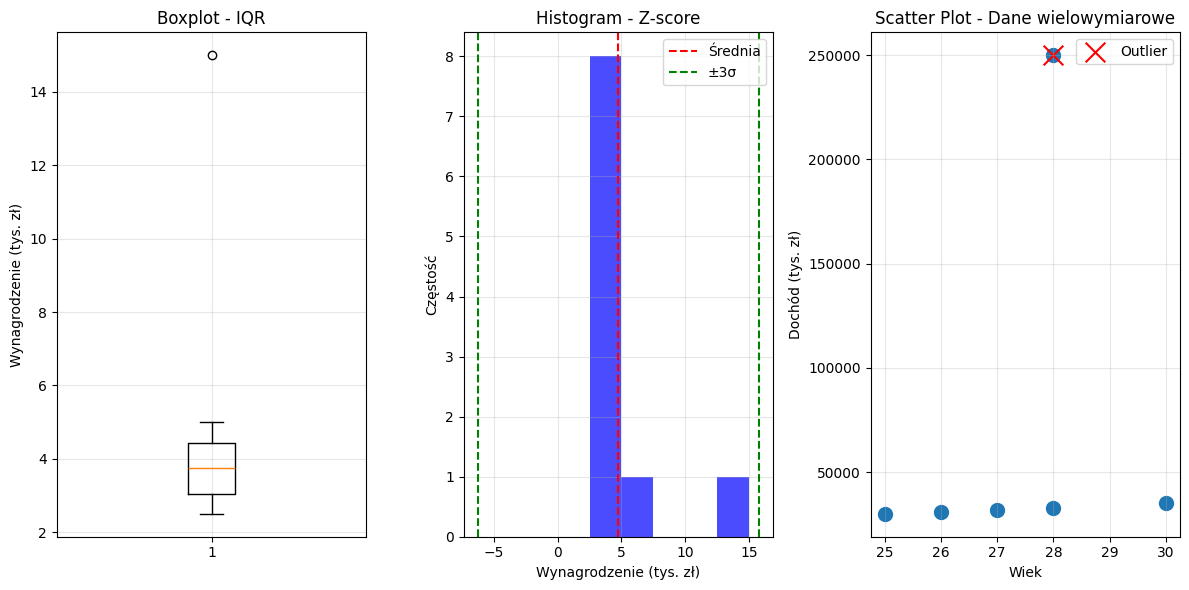

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(dane)
plt.ylabel('Wynagrodzenie (tys. zł)')
plt.title('Boxplot - IQR')
plt.grid(True, alpha=0.3)

# Histogram z Z-score
plt.subplot(1, 3, 2)
plt.hist(dane, bins=5, alpha=0.7, color='blue')
plt.axvline(srednia, color='red', linestyle='--', label='Średnia')
plt.axvline(srednia + 3*std_dev, color='green', linestyle='--', label='±3σ')
plt.axvline(srednia - 3*std_dev, color='green', linestyle='--')
plt.xlabel('Wynagrodzenie (tys. zł)')
plt.ylabel('Częstość')
plt.title('Histogram - Z-score')
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter plot 2D
plt.subplot(1, 3, 3)
plt.scatter(dane_2d[:, 0], dane_2d[:, 1], s=100)
plt.scatter(dane_2d[-1, 0], dane_2d[-1, 1], color='red', s=200, marker='x', label='Outlier')
plt.xlabel('Wiek')
plt.ylabel('Dochód (tys. zł)')
plt.title('Scatter Plot - Dane wielowymiarowe')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Zadanie 1**


Pracujesz w firmie zajmującej się e-commerce. Otrzymałeś dane o sprzedaży
dziennej (liczba sztuk) z ostatnich 30 dni.


ZADANIE:
- Wczytaj dane sprzedażowe
- Zrób wizualizację danych
- Zastosuj metodę IQR, z-score oraz opartą na percentylach (1-99%)
- Zidentyfikuj outliersów
- Wyjaśnij co mogło się stać




--- Dane Sprzedażowe ---
   Unnamed: 0  dzien  sprzedaz dzien_tygodnia
0           0      1        65             Pn
1           1      2        71             Wt
2           2      3        69             Sr
3           3      4        73             Cz
4           4      5        74             Pt

Wybrana kolumna do analizy: 'sprzedaz'
Liczba obserwacji: 28

METODA IQR
Q1 (25. percentyl) = 43.50
Q3 (75. percentyl) = 72.00
IQR = 28.50
Dolny limit = 0.75
Górny limit = 114.75

Outliersy wykryte metodą IQR: [348]
Liczba outliersów (IQR): 1

METODA Z-SCORE
Średnia = 71.75
Odchylenie standardowe = 55.99

Z-score dla każdej wartości:
    65.00: z =   0.12 
    71.00: z =   0.01 
    69.00: z =   0.05 
    73.00: z =   0.02 
    74.00: z =   0.04 
    44.00: z =   0.50 
    41.00: z =   0.56 
    71.00: z =   0.01 
    72.00: z =   0.00 
    70.00: z =   0.03 
    73.00: z =   0.02 
    75.00: z =   0.06 
    42.00: z =   0.54 
    36.00: z =   0.65 
    64.00: z =   0.14 
    69.00: z =  

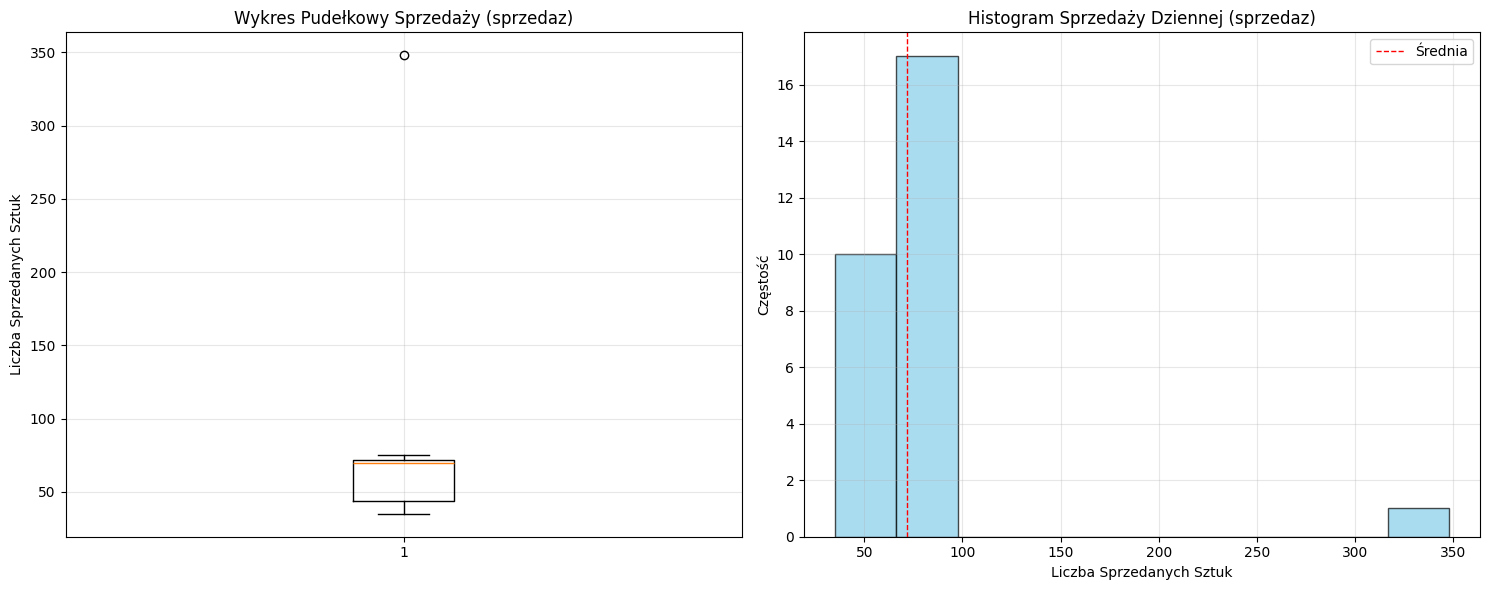

In [10]:
data = pd.read_csv('sprzedaz_dzienna.csv')
column_name = "sprzedaz"
sales_data = data[column_name].values
print("\n--- Dane Sprzedażowe ---")
print(data.head())
print(f"\nWybrana kolumna do analizy: '{column_name}'")
print(f"Liczba obserwacji: {len(sales_data)}")

print("\n" + "="*60)
print("METODA IQR")
print("="*60)

Q1 = np.percentile(sales_data, 25)
Q3 = np.percentile(sales_data, 75)
IQR = Q3 - Q1
dolny_limit_iqr = Q1 - 1.5 * IQR
gorny_limit_iqr = Q3 + 1.5 * IQR

print(f"Q1 (25. percentyl) = {Q1:.2f}")
print(f"Q3 (75. percentyl) = {Q3:.2f}")
print(f"IQR = {IQR:.2f}")
print(f"Dolny limit = {dolny_limit_iqr:.2f}")
print(f"Górny limit = {gorny_limit_iqr:.2f}")

outliers_iqr = sales_data[(sales_data < dolny_limit_iqr) | (sales_data > gorny_limit_iqr)]
print(f"\nOutliersy wykryte metodą IQR: {outliers_iqr}")
print(f"Liczba outliersów (IQR): {len(outliers_iqr)}")


print("\n" + "="*60)
print("METODA Z-SCORE")
print("="*60)

srednia_sales = np.mean(sales_data)
std_dev_sales = np.std(sales_data, ddof=1)

z_scores_sales = np.abs(stats.zscore(sales_data))

print(f"Średnia = {srednia_sales:.2f}")
print(f"Odchylenie standardowe = {std_dev_sales:.2f}")
print(f"\nZ-score dla każdej wartości:")
for i, (wartosc, z) in enumerate(zip(sales_data, z_scores_sales)):
    status = "OUTLIER" if z > 3 else ""
    print(f"  {wartosc:7.2f}: z = {z:6.2f} {status}")

outliers_zscore = sales_data[z_scores_sales > 3]
print(f"\nOutliersy wykryte metodą Z-score (|z| > 3): {outliers_zscore}")
print(f"Liczba outliersów (Z-score): {len(outliers_zscore)}")


print("\n" + "="*60)
print("METODA PERCENTYLOWA (1-99%)")
print("="*60)

p1 = np.percentile(sales_data, 1)
p99 = np.percentile(sales_data, 99)

print(f"1. percentyl = {p1:.2f}")
print(f"99. percentyl = {p99:.2f}")

outliers_percentile = sales_data[(sales_data < p1) | (sales_data > p99)]
print(f"\nOutliersy wykryte metodą percentylową (1-99%): {outliers_percentile}")
print(f"Liczba outliersów (percentylowa): {len(outliers_percentile)}")


print("\n" + "="*60)
print("WIZUALIZACJA DANYCH")
print("="*60)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.boxplot(sales_data)
plt.title(f'Wykres Pudełkowy Sprzedaży ({column_name})')
plt.ylabel('Liczba Sprzedanych Sztuk')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(sales_data, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(srednia_sales, color='red', linestyle='dashed', linewidth=1, label='Średnia')

plt.title(f'Histogram Sprzedaży Dziennej ({column_name})')
plt.xlabel('Liczba Sprzedanych Sztuk')
plt.ylabel('Częstość')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **Zadanie 2**

Jesteś analitykiem w banku. Otrzymałeś dane o klientach zaciągających kredyty.
Każdy klient ma 4 cechy:
  1. Wiek (lata)
  2. Dochód roczny (tys. PLN)
  3. Suma kredytów (tys. PLN)
  4. Liczba lat jako klient

Do zrobienia:
- Zidentyfikować klientów wielowymiarowych outliersów
- Użyj metody z-score dla każdego wymiaru osobno



In [17]:
data = pd.read_csv("klienci_banku.csv")
print("\n--- Dane Klienci Banku ---")

print(data.head())
print(f"\nLiczba obserwacji: {len(data)}")

columns_for_zscore = ['wiek_lat', 'dochod_roczny_tys', 'suma_kredytow_tys', 'lata_jako_klient']
df_numerical = data[columns_for_zscore]
z_score = df_numerical.apply(lambda x: np.abs(stats.zscore(x)))

outliners_mask = (z_score > 2).any(axis=1)
outliners = data[outliners_mask]

print(z_score.head())
print(f"\n OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):")
print(outliners.to_string())
print(f"Liczba wykrytych outliersów: {len(outliners)}")


--- Dane Klienci Banku ---
   Unnamed: 0  wiek_lat  dochod_roczny_tys  suma_kredytow_tys  \
0           0     53.18              80.63              65.34   
1           1     41.28              75.23             218.69   
2           2     48.89              87.45             145.27   
3           3     43.44              64.46             212.89   
4           4     46.16              91.39              71.28   

   lata_jako_klient  
0             12.99  
1              3.96  
2              2.99  
3              7.93  
4              9.25  

Liczba obserwacji: 50
   wiek_lat  dochod_roczny_tys  suma_kredytow_tys  lata_jako_klient
0  0.066194           0.158499           0.229029          0.229273
1  0.154794           0.166336           0.117703          0.425109
2  0.098135           0.148601           0.171003          0.495403
3  0.138712           0.181967           0.121913          0.137413
4  0.118461           0.142883           0.224717          0.041756

✓ OUTLIERSY WIELO